## SMAI Assignment - 1

### Q1.0 Dataset Generation

In [9]:
# Example: compute required seed from IIITH username
import hashlib, numpy as np

import numpy as np
import pandas as pd
import hashlib

class StudentDataset:
    """
    A class to generate and store student dataset with attributes:
    gender, major, program, and GPA.
    
    Attributes:
        num_students (int): Number of student records to generate.
        seed (int): Random seed for reproducibility.
        rng (np.random.Generator): Random number generator instance.
        df (pd.DataFrame): Generated dataset stored as a DataFrame.
    """

    def __init__(self, num_students: int, seed: int):
        """
        Initializes the dataset with the given number of students and seed.
        Generates the full dataset once during initialization.
        """
        self.num_students = num_students
        self.seed = seed
        self.rng = np.random.default_rng(seed)

        # Generate dataset
        self.df = self.assemble_dataframe()

    def get_full_dataframe(self) -> pd.DataFrame:
        """
        Returns the complete dataset as a pandas DataFrame.
        """
        return self.df

    def generate_gender(self) -> list[str]:
        """
        Generates gender distribution for students.
        Probabilities: Male (65%), Female (33%), Other (2%).
        """
        return self.rng.choice(
            ["Male", "Female", "Other"],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        ).tolist()

    def generate_major(self) -> list[str]:
        """
        Generates major distribution for students.
        Probabilities: B.Tech (70%), MS (20%), PhD (10%).
        """
        return self.rng.choice(
            ["B.Tech", "MS", "PhD"],
            size=self.num_students,
            p=[0.70, 0.20, 0.10]
        ).tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        """
        Generates program distribution conditioned on major.
        """
        programs = []
        for major in majors:
            if major == "B.Tech":
                probs = [0.40, 0.40, 0.10, 0.10]
            elif major == "MS":
                probs = [0.30, 0.30, 0.20, 0.20]
            else:  # PhD
                probs = [0.25, 0.25, 0.25, 0.25]
            
            prog = self.rng.choice(
                ["CSE", "ECE", "CHD", "CND"],
                p=probs
            )
            programs.append(prog)
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        """
        Generates GPA values based on major using normal distributions:
        - B.Tech: N(7.0, 1.0)
        - MS: N(8.0, 0.7)
        - PhD: N(8.3, 0.5)
        Values are clipped to [4.0, 10.0].
        """
        gpas = []
        for major in majors:
            if major == "B.Tech":
                gpa = self.rng.normal(7.0, 1.0)
            elif major == "MS":
                gpa = self.rng.normal(8.0, 0.7)
            else:  # PhD
                gpa = self.rng.normal(8.3, 0.5)

            # Clip GPA to range [4.0, 10.0]
            gpa = np.clip(gpa, 4.0, 10.0)
            gpas.append(round(gpa, 2))  # Round for readability
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        """
        Assembles the full dataset with gender, major, program, and GPA.
        """
        genders = self.generate_gender()
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)

        df = pd.DataFrame({
            "Gender": genders,
            "Major": majors,
            "Program": programs,
            "GPA": gpas
        })
        return df

username = "hiten.garg"   # <-- replace with the part before @
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
# rng = np.random.default_rng(seed)

# Create dataset
dataset = StudentDataset(num_students=10000, seed=seed)

df = dataset.get_full_dataframe()
print(df.head())
print()
print(df.describe(include="all"))

   Gender   Major Program   GPA
0  Female  B.Tech     ECE  7.31
1    Male  B.Tech     ECE  7.68
2    Male  B.Tech     CSE  7.97
3    Male  B.Tech     ECE  6.75
4  Female      MS     ECE  7.61

       Gender   Major Program           GPA
count   10000   10000   10000  10000.000000
unique      3       3       4           NaN
top      Male  B.Tech     CSE           NaN
freq     6472    7027    3732           NaN
mean      NaN     NaN     NaN      7.328968
std       NaN     NaN     NaN      1.035183
min       NaN     NaN     NaN      4.000000
25%       NaN     NaN     NaN      6.610000
50%       NaN     NaN     NaN      7.390000
75%       NaN     NaN     NaN      8.100000
max       NaN     NaN     NaN     10.000000


### Q1.1 Dataset Analysis

#### (a) Visualizations

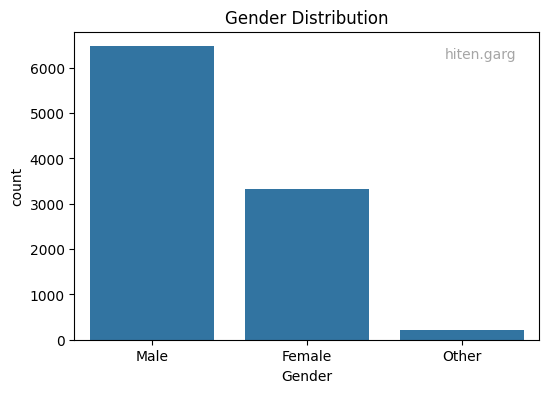

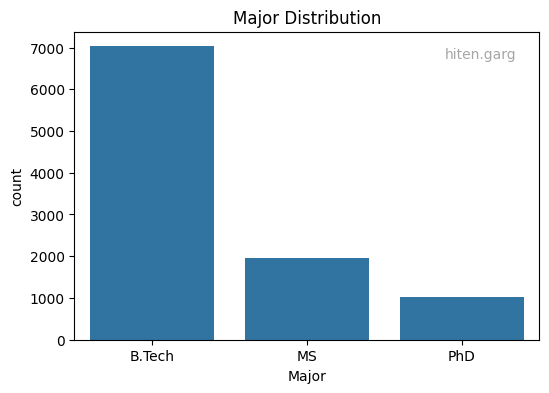

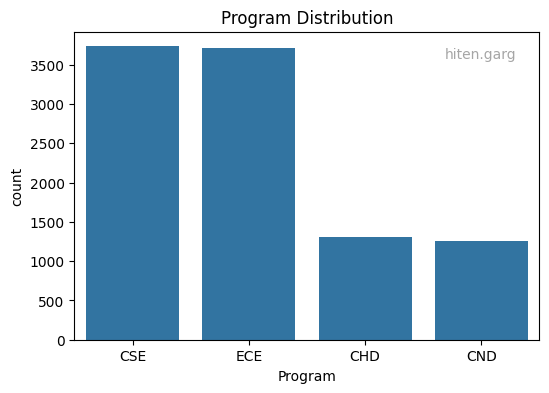

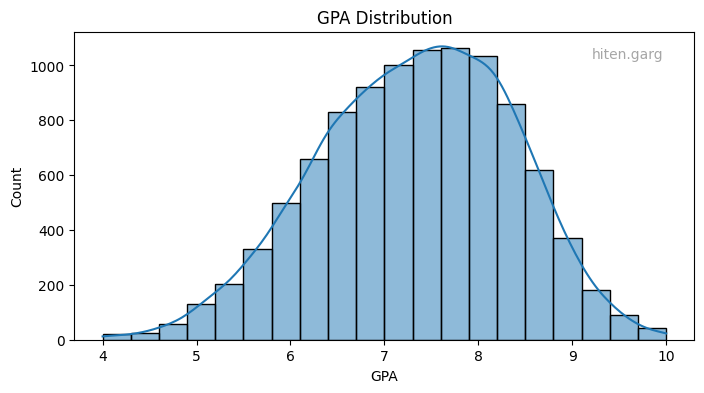

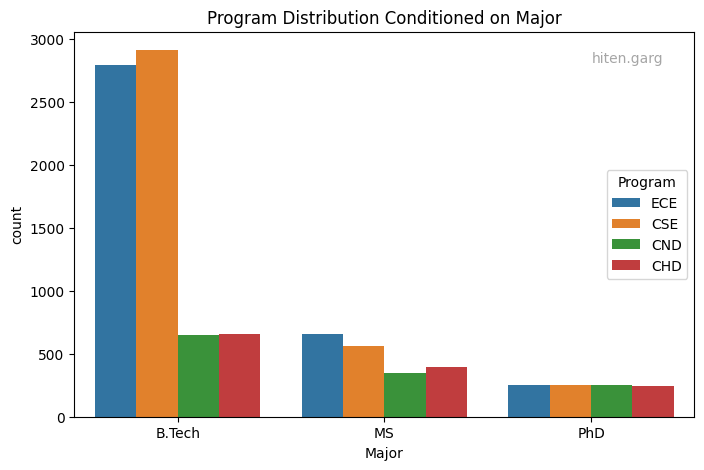

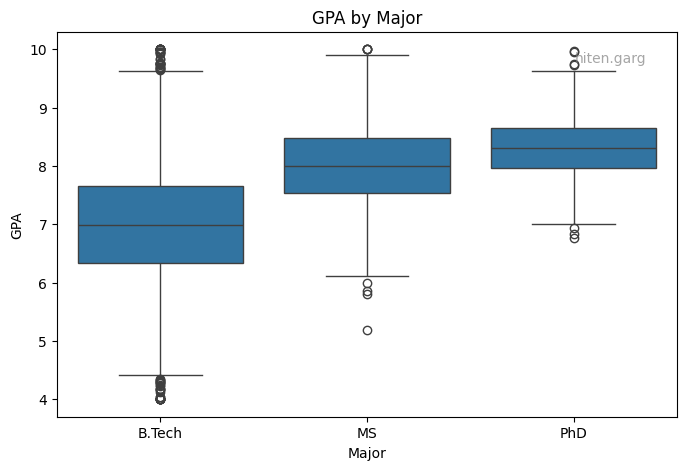

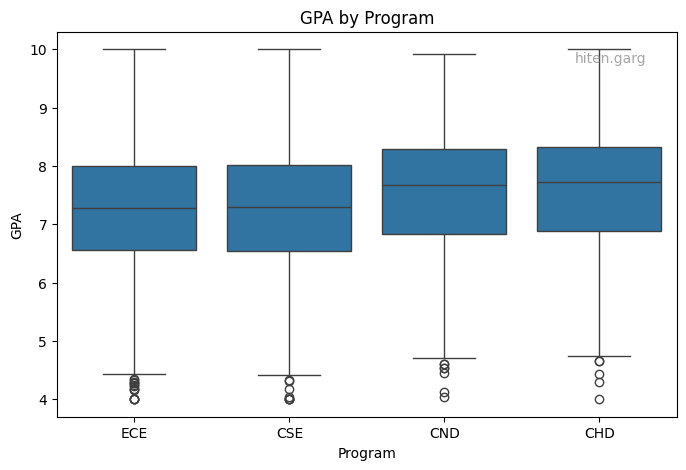

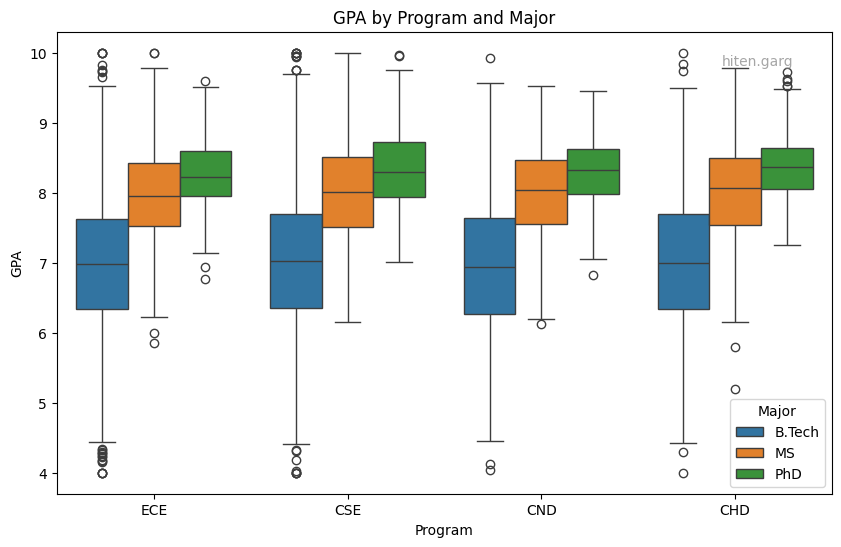

,Gender,Major,Program,GPA
8416,Male,B.Tech,ECE,8.34
3432,Male,B.Tech,CND,7.07
1007,Male,MS,ECE,8.36
612,Male,B.Tech,CHD,6.83
4585,Female,B.Tech,ECE,7.14
...,...,...,...,...
8836,Male,PhD,CND,7.49
9685,Male,B.Tech,ECE,4.87
3625,Male,PhD,CND,8.53
7758,Male,MS,CHD,8.08


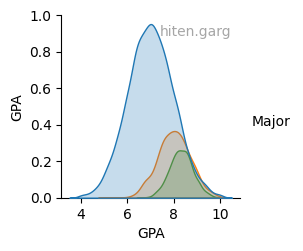

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_username_watermark():
    plt.text(
        0.95, 0.95, "hiten.garg",
        ha="right", va="top",
        transform=plt.gca().transAxes,
        fontsize=10, color="gray", alpha=0.7
    )

# --- Visualization methods ---
def plot_gender_distribution(self):
    plt.figure(figsize=(6,4))
    sns.countplot(x="Gender", data=self.df, order=["Male","Female","Other"])
    plt.title("Gender Distribution")
    add_username_watermark()
    plt.show()

def plot_major_distribution(self):
    plt.figure(figsize=(6,4))
    sns.countplot(x="Major", data=self.df, order=["B.Tech","MS","PhD"])
    plt.title("Major Distribution")
    add_username_watermark()
    plt.show()

def plot_program_distribution(self):
    plt.figure(figsize=(6,4))
    sns.countplot(x="Program", data=self.df, order=["CSE","ECE","CHD","CND"])
    plt.title("Program Distribution")
    add_username_watermark()
    plt.show()

def plot_gpa_distribution(self, bins=20):
    plt.figure(figsize=(8,4))
    sns.histplot(self.df["GPA"], bins=bins, kde=True)
    plt.title("GPA Distribution")
    plt.xlabel("GPA")
    plt.ylabel("Count")
    add_username_watermark()
    plt.show()

def plot_program_by_major(self):
    plt.figure(figsize=(8,5))
    sns.countplot(x="Major", hue="Program", data=self.df)
    plt.title("Program Distribution Conditioned on Major")
    add_username_watermark()
    plt.show()

def plot_gpa_by_major(self):
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Major", y="GPA", data=self.df)
    plt.title("GPA by Major")
    add_username_watermark()
    plt.show()

def plot_gpa_by_program(self):
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Program", y="GPA", data=self.df)
    plt.title("GPA by Program")
    add_username_watermark()
    plt.show()

def plot_gpa_by_program_and_major(self):
    plt.figure(figsize=(10,6))
    sns.boxplot(x="Program", y="GPA", hue="Major", data=self.df)
    plt.title("GPA by Program and Major")
    add_username_watermark()
    plt.show()

def plot_sampled_dataset(self, n=100):
    sample_df = self.df.sample(n, random_state=self.seed)
    display(sample_df)

def plot_entire_dataset_summary(self):
    sns.pairplot(self.df, hue="Major")  # uses all numeric columns automatically
    add_username_watermark()            # optional watermark
    plt.show()


# --- Attach the methods to your existing class ---
StudentDataset.plot_gender_distribution = plot_gender_distribution
StudentDataset.plot_major_distribution = plot_major_distribution
StudentDataset.plot_program_distribution = plot_program_distribution
StudentDataset.plot_gpa_distribution = plot_gpa_distribution
StudentDataset.plot_program_by_major = plot_program_by_major
StudentDataset.plot_gpa_by_major = plot_gpa_by_major
StudentDataset.plot_gpa_by_program = plot_gpa_by_program
StudentDataset.plot_gpa_by_program_and_major = plot_gpa_by_program_and_major
StudentDataset.plot_sampled_dataset = plot_sampled_dataset
StudentDataset.plot_entire_dataset_summary = plot_entire_dataset_summary

# --- Example usage ---
dataset.plot_gender_distribution()
dataset.plot_major_distribution()
dataset.plot_program_distribution()
dataset.plot_gpa_distribution()
dataset.plot_program_by_major()
dataset.plot_gpa_by_major()
dataset.plot_gpa_by_program()
dataset.plot_gpa_by_program_and_major()
dataset.plot_sampled_dataset()
dataset.plot_entire_dataset_summary()


#### (b) GPA Summary Statistics

In [11]:
def gpa_mean_std(self) -> tuple[float, float]:
    """
    Computes and returns the mean and standard deviation of GPA.

    Returns:
        tuple: (mean_gpa, std_gpa)
    """
    mean_gpa = self.df["GPA"].mean()
    std_gpa = self.df["GPA"].std()
    return mean_gpa, std_gpa

StudentDataset.gpa_mean_std = gpa_mean_std

mean_gpa, std_gpa = dataset.gpa_mean_std()
print(f"Mean GPA: {mean_gpa:.2f}")
print(f"Standard Deviation of GPA: {std_gpa:.2f}")


Mean GPA: 7.33
Standard Deviation of GPA: 1.04


**Mean GPA:** 7.33  
**Standard Deviation of GPA:** 1.04  

**Observations:**

- On average, students in the dataset have a GPA of 7.33 out of 10, indicating that most students are performing slightly above the midpoint but below the top end.  
- The GPA values have a standard deviation of 1.04, showing a moderate variation in student performance; most GPAs lie roughly between 6.3 and 8.3 (mean ± 1 std).  
- The dataset exhibits fairly consistent academic performance with a moderate spread.  
- There may be some outliers at the lower end (clipped at 4.0) and higher end (clipped at 10.0), but the majority of students are clustered around the mean.


#### (c) Program-Major Combinations

Major    B.Tech   MS  PhD
Program                  
CHD         660  394  248
CND         652  344  255
CSE        2915  563  254
ECE        2800  659  256


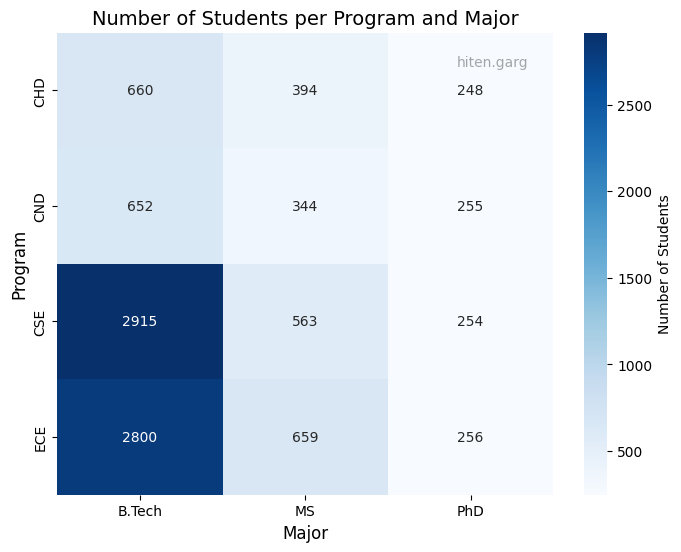

In [12]:
def count_students_per_program_major_pair(self) -> pd.DataFrame:
    """
    Count the number of students for each unique (Program, Major) pair.
    
    Returns:
        pd.DataFrame: A DataFrame with Programs as rows, Majors as columns,
                      and counts as values.
    """
    counts_df = (
        self.df.groupby(["Program", "Major"])
        .size()
        .unstack(fill_value=0)
    )
    return counts_df


def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
    """
    Visualize the (Program, Major) student counts using a heatmap.
    
    Args:
        counts_df (pd.DataFrame): DataFrame with counts of students per Program-Major pair.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(counts_df, annot=True, fmt="d", cmap="Blues", cbar=True)

    plt.title("Number of Students per Program and Major", fontsize=14)
    plt.xlabel("Major", fontsize=12)
    plt.ylabel("Program", fontsize=12)

    # Add label for colorbar
    cbar = plt.gca().collections[0].colorbar
    cbar.set_label("Number of Students")

    # Add username watermark
    add_username_watermark()

    plt.show()

StudentDataset.count_students_per_program_major_pair = count_students_per_program_major_pair

counts_df = dataset.count_students_per_program_major_pair()
print(counts_df)

StudentDataset.visualize_students_per_program_major_pair = visualize_students_per_program_major_pair

dataset.visualize_students_per_program_major_pair(counts_df)

